# Classification - How does a school's environment affect students' Math and ELA Assessment Scores?

Predict whether a school will not meet (1), approach (2), meet (3), or exceed (4) target

**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import pickle

# libraries for cleaning and preprocessing data
from sklearn.preprocessing import StandardScaler

# libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import lightgbm as lgb

# libraries for evaluating models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

# libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

/Users/sharonkwak/anaconda3/lib/python3.7/site-packages/lightgbm/__init__.py:48: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


## Data Preprocessing

**Read Data**

In [2]:
nyc_schools = pd.read_csv('Data/nyc_schools.csv')
nyc_schools.head()

,DBN,School Name,Enrollment,Supportive Environment Rating,Student Achievement Rating,Interesting and challenging curriculum,Effective teaching and learning,Effective school assessment,Clear communication - high expectations,Teacher collaboration,...,Student Attendance Rate,Percent of Students Chronically Absent,Teacher Attendance Rate,Collaborative Teachers Score,Effective School Leadership Score,Rigorous Instruction Score,Strong Family-Community Ties Score,Trust Score,Borough,District
0,01M015,P.S. 015 Roberto Clemente,173,4,4,4,3,3,3,3,...,0.939,0.186,0.985,4.12,4.09,3.91,3.80,3.99,Manhattan,1
1,01M019,P.S. 019 Asher Levy,244,3,4,4,4,4,4,4,...,0.914,0.353,0.968,4.27,4.25,4.64,4.10,3.55,Manhattan,1
2,01M020,P.S. 020 Anna Silver,463,2,2,2,2,2,3,2,...,0.930,0.274,0.967,2.76,3.04,1.94,3.64,3.12,Manhattan,1
3,01M034,P.S. 034 Franklin D. Roosevelt,320,2,2,2,2,2,3,3,...,0.901,0.391,0.976,2.40,2.45,2.04,3.33,2.32,Manhattan,1
4,01M063,The STAR Academy - P.S.63,177,3,4,4,3,4,3,4,...,0.927,0.261,0.980,4.53,4.07,4.14,4.01,3.95,Manhattan,1


**Define features and target**

In [3]:
X = nyc_schools.drop('Student Achievement Rating',
                    axis=1).iloc[:, 2:]
y = nyc_schools['Student Achievement Rating']

**Encode categorical variables**

In [4]:
X = pd.get_dummies(X, drop_first=True)

**Train-test split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=220)

**Standardize variables**

In [6]:
scale = StandardScaler()
X_train_scale = pd.DataFrame(scale.fit_transform(X_train),
                             columns=X.columns)
X_test_scale = pd.DataFrame(scale.transform(X_test),
                            columns=X.columns)

## Modeling

### Random Forest

In [10]:
# Vanilla Model
rf_v = RandomForestClassifier(random_state=220)

rf_v.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=220,
                       verbose=0, warm_start=False)

In [11]:
rf_v.score(X_test, y_test)

0.51953125

**Tuning hyperparameters**

In [12]:
# parameter grid
rf_grid = {'n_estimators': [120, 300, 500],
           'min_samples_split': [2, 3, 4],
           'min_samples_leaf': [1, 2, 3],
           'max_features': ['log2', 'auto']}

In [13]:
rf_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=220),
                     param_grid=rf_grid,
                     scoring='f1_micro',
                     cv=5, verbose=1, n_jobs=-1)

rf_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   47.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=220,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'m

In [14]:
print('Best params:', rf_gs.best_params_)
print('Train score: %.3f' % rf_gs.best_score_)
print('Test score: %.3f' % rf_gs.score(X_test, y_test))

Best params: {'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Train score: 0.530
Test score: 0.598


### LightGBM

In [67]:
# Vanilla Model
lgb_v = lgb.LGBMClassifier(random_state=220)

lgb_v.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=220, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [68]:
rf_v.score(X_test, y_test)

0.51953125

**Tuning hyperparameters**

In [78]:
# parameter grid
lgb_grid = {'learning_rate': [0.015, 0.025],
            'max_depth': [12, 15, 17],
            'min_child_weight': [5, 7, 9],
            'subsample': [0.1, 0.3, 0.5]}

In [79]:
lgb_gs = GridSearchCV(estimator=lgb.LGBMClassifier(random_state=220),
                      param_grid=lgb_grid,
                      scoring='f1_micro',
                      cv=5, verbose=1, n_jobs=-1)

lgb_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   38.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_state=220, reg_alpha=0.0,
                                      reg_lambda=0.0, silent=True,
                                      subsample=1.0, subsample_for_bin=200000,
                                      subsample_freq=0),
             iid='warn', n_jobs=-1,
             param_grid={'learning_rate': [0.015, 0.025],
                         'max

In [80]:
print('Best params:', lgb_gs.best_params_)
print('Train score: %.3f' % lgb_gs.best_score_)
print('Test score: %.3f' % lgb_gs.score(X_test, y_test))

Best params: {'learning_rate': 0.025, 'max_depth': 15, 'min_child_weight': 7, 'subsample': 0.1}
Train score: 0.525
Test score: 0.570


### Logistic Regression

In [15]:
# Vanilla Model
log_v = LogisticRegression(random_state=220)

log_v.fit(X_train_scale, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=220, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [16]:
log_v.score(X_test_scale, y_test)

0.61328125

**Tuning hyperparameters**

In [17]:
# parameter grid
log_grid = {'penalty': ['l1', 'l2'],
           'C': [0.001, 0.01, 1]}

In [18]:
log_gs = GridSearchCV(estimator=LogisticRegression(random_state=220),
                      param_grid=log_grid,
                      scoring='f1_micro',
                      cv=5, verbose=1, n_jobs=-1)

log_gs.fit(X_train_scale, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=220, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=1)

In [19]:
print('Best params:', log_gs.best_params_)
print('Train score: %.3f' % log_gs.best_score_)
print('Test score: %.3f' % log_gs.score(X_test_scale, y_test))

Best params: {'C': 1, 'penalty': 'l2'}
Train score: 0.508
Test score: 0.613


### KNN

In [81]:
# Vanilla Model
knn_v = KNeighborsClassifier()

knn_v.fit(X_train_scale, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
knn_v.score(X_test_scale, y_test)

0.50390625

**Tuning hyperparameters**

In [95]:
# parameter grid
knn_grid = {'n_neighbors': [30, 34, 40],
           'p': [2, 3]}

In [96]:
knn_gs = GridSearchCV(estimator=KNeighborsClassifier(),
                     param_grid=knn_grid,
                     scoring='f1_micro',
                     cv=5, verbose=1, n_jobs=-1)

knn_gs.fit(X_train_scale, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [30, 34, 40], 'p': [2, 3]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_micro', verbose=1)

In [97]:
print('Best params:', knn_gs.best_params_)
print('Train score: %.3f' % knn_gs.best_score_)
print('Test score: %.3f' % knn_gs.score(X_test_scale, y_test))

Best params: {'n_neighbors': 34, 'p': 2}
Train score: 0.508
Test score: 0.547


### SVM

In [30]:
# Vanilla Model
svm_v = SVC(kernel='linear', random_state=220)

svm_v.fit(X_train_scale, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=220,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
svm_v.score(X_test_scale, y_test)

0.62109375

**Tuning hyperparameters**

In [147]:
# parameter grid
svm_grid = {'C': [0.1, 1, 10],
           'class_weight': ['balanced', None]}

In [154]:
svm_gs = GridSearchCV(estimator=SVC(kernel='linear',
                                    random_state=220),
                     param_grid=svm_grid,
                     scoring='f1_micro',
                     cv=5, verbose=1, n_jobs=-1)

svm_gs.fit(X_train_scale, y_train)
pickle.dump(svm_gs, open('Models/svm.sav', 'wb'))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.4s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.5s finished


In [7]:
svm_gs = pickle.load(open('Models/svm.sav', 'rb'))

print('Best params:', svm_gs.best_params_)
print('Train score: %.3f' % svm_gs.best_score_)
print('Test score: %.3f' % svm_gs.score(X_test_scale, y_test))

Best params: {'C': 1, 'class_weight': None}
Train score: 0.523
Test score: 0.621


In [21]:
from scipy.stats import mode

In [28]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('lr', log_gs),
                                     ('svm', svm_gs)],
                         voting='hard')
model.fit(X_train_scale, y_train)
model.score(X_test_scale, y_test)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    4.3s finished


0.625

## Modeling with balanced classes

In [112]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


### Undersampling

In [113]:
nyc_schools['Student Achievement Rating'].value_counts()

3    531
2    358
4    347
1     40
Name: Student Achievement Rating, dtype: int64

In [114]:
undersampled = resample(nyc_schools[nyc_schools['Student Achievement Rating']
                                    != 3],
                        replace=False,  # sample without replacement
                        # match number in majority class
                        n_samples=sum(nyc_schools['Student Achievement Rating']
                                      == 3),
                        random_state=220)  # reproducible results
output_df = pd.concat([nyc_schools.loc[nyc_schools['Student Achievement Rating']
                                       == 3],
                       undersampled])

In [115]:
output_df['Student Achievement Rating'].value_counts()

3    531
2    256
4    242
1     33
Name: Student Achievement Rating, dtype: int64

In [116]:
X_u = output_df.drop(columns='Student Achievement Rating',
                          axis=1)
y_u = output_df['Student Achievement Rating']

In [117]:
X_u = pd.get_dummies(X_u, drop_first=True)

In [118]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_u, y_u, test_size=0.2,
                                                            random_state=220)

In [119]:
X_train_scale = pd.DataFrame(scale.fit_transform(X_train_u),
                             columns=X_u.columns)
X_test_scale = pd.DataFrame(scale.transform(X_test_u),
                            columns=X_u.columns)

### SVM

In [120]:
# Vanilla Model
svm_v = SVC(kernel='linear', random_state=220)

svm_v.fit(X_train_scale, y_train_u)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=220,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
svm_v.score(X_test_scale, y_test_u)

0.4835680751173709

**Tuning hyperparameters**

In [122]:
# parameter grid
svm_grid = {'C': [0.001, 0.005, 0.01],
           'class_weight': ['balanced', None]}

In [123]:
svm_gs = GridSearchCV(estimator=SVC(kernel='linear', random_state=220),
                     param_grid=svm_grid,
                     scoring='recall_micro',
                     cv=5, verbose=1, n_jobs=-1)

svm_gs.fit(X_train_scale, y_train_u)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   22.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=220,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall_micro', verbose=1)

In [124]:
print('Best params:', svm_gs.best_params_)
print('Train score: %.3f' % svm_gs.best_score_)
print('Test score: %.3f' % svm_gs.score(X_test_scale, y_test_u))

Best params: {'C': 0.001, 'class_weight': None}
Train score: 0.522
Test score: 0.484


### Oversampling

In [125]:
oversampled = resample(nyc_schools[nyc_schools['Student Achievement Rating']
                                   != 1],
                       replace=True,  # sample without replacement
                       # match number in majority class
                       n_samples=sum(nyc_schools['Student Achievement Rating']
                                      == 1),
                       random_state=220)  # reproducible results
output_df_over = pd.concat([nyc_schools.loc[nyc_schools['Student Achievement Rating']
                                            == 1],
                            oversampled])
X_train_o, y_train_o = output_df_over.drop(columns='Student Achievement Rating',
                                           axis=1
                                           ), output_df['Student Achievement Rating']

In [126]:
output_df_over['Student Achievement Rating'].value_counts()

1    40
3    17
4    14
2     9
Name: Student Achievement Rating, dtype: int64

In [127]:
X_o = output_df.drop(columns='Student Achievement Rating',
                          axis=1)
y_o = output_df['Student Achievement Rating']

In [128]:
X_o = pd.get_dummies(X_u, drop_first=True)

In [129]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.2,
                                                            random_state=220)

In [130]:
X_train_scale = pd.DataFrame(scale.fit_transform(X_train_o),
                             columns=X_u.columns)
X_test_scale = pd.DataFrame(scale.transform(X_test_o),
                            columns=X_u.columns)

### SVM

In [131]:
# Vanilla Model
svm_v = SVC(kernel='linear', random_state=220)

svm_v.fit(X_train_scale, y_train_o)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=220,
    shrinking=True, tol=0.001, verbose=False)

In [132]:
svm_v.score(X_test_scale, y_test_o)

0.4835680751173709

**Tuning hyperparameters**

In [133]:
# parameter grid
svm_grid = {'C': [0.001, 0.005, 0.01],
           'class_weight': ['balanced', None]}

In [134]:
svm_gs = GridSearchCV(estimator=SVC(kernel='linear', random_state=220),
                     param_grid=svm_grid,
                     scoring='recall_micro',
                     cv=5, verbose=1, n_jobs=-1)

svm_gs.fit(X_train_scale, y_train_o)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   21.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=220,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.001, 0.005, 0.01],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall_micro', verbose=1)

In [135]:
print('Best params:', svm_gs.best_params_)
print('Train score: %.3f' % svm_gs.best_score_)
print('Test score: %.3f' % svm_gs.score(X_test_scale, y_test_o))

Best params: {'C': 0.001, 'class_weight': None}
Train score: 0.522
Test score: 0.484


### SMOTE

In [137]:
sm_model = SMOTE(sampling_strategy='minority',
                 random_state=220)
X_train_s, y_train_s = sm_model.fit_sample(X_train_scale, y_train)

### SVM

In [138]:
# Vanilla Model
svm_v = SVC(kernel='linear', random_state=220)

svm_v.fit(X_train_s, y_train_s)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=220,
    shrinking=True, tol=0.001, verbose=False)

In [139]:
svm_v.score(X_test_scale, y_test)

0.52734375

**Tuning hyperparameters**

In [143]:
# parameter grid
svm_grid = {'C': [10, 100, 1000],
           'class_weight': ['balanced', None]}

In [144]:
svm_gs = GridSearchCV(estimator=SVC(kernel='linear', random_state=220),
                     param_grid=svm_grid,
                     scoring='recall_micro',
                     cv=5, verbose=1, n_jobs=-1)

svm_gs.fit(X_train_s, y_train_s)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.7min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=220,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [10, 100, 1000],
                         'class_weight': ['balanced', None]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall_micro', verbose=1)

In [145]:
print('Best params:', svm_gs.best_params_)
print('Train score: %.3f' % svm_gs.best_score_)
print('Test score: %.3f' % svm_gs.score(X_test_scale, y_test))

Best params: {'C': 1000, 'class_weight': None}
Train score: 0.589
Test score: 0.492


## Findings

In [10]:
# create a DataFrame of the features and coefficients 
svm_feat_imp = pd.DataFrame(zip(X_train_scale.columns,
                                svm_gs.best_estimator_.coef_[0],
                                np.abs(svm_gs.best_estimator_.coef_[0])),
                            columns=['Feature', 'Coefficient',
                                     'Absolute Coefficient'])

# sort values by the absolute coefficient
svm_feat_imp.sort_values(by=['Absolute Coefficient'],
                         ascending=True, inplace=True)

svm_feat_imp.head(10)

,Feature,Coefficient,Absolute Coefficient
34,Borough_Manhattan,-0.002157,0.002157
7,"Safety, inclusivity, social-emotional growth",0.003280,0.003280
14,Percent Self-Contained,-0.003723,0.003723
11,School decision evaluation and adjustment,-0.004204,0.004204
31,Trust Score,0.007497,0.007497
33,Borough_Brooklyn,-0.007711,0.007711
4,Effective school assessment,-0.007872,0.007872
36,Borough_Staten Island,-0.010067,0.010067
26,Teacher Attendance Rate,0.015159,0.015159
35,Borough_Queens,-0.015889,0.015889


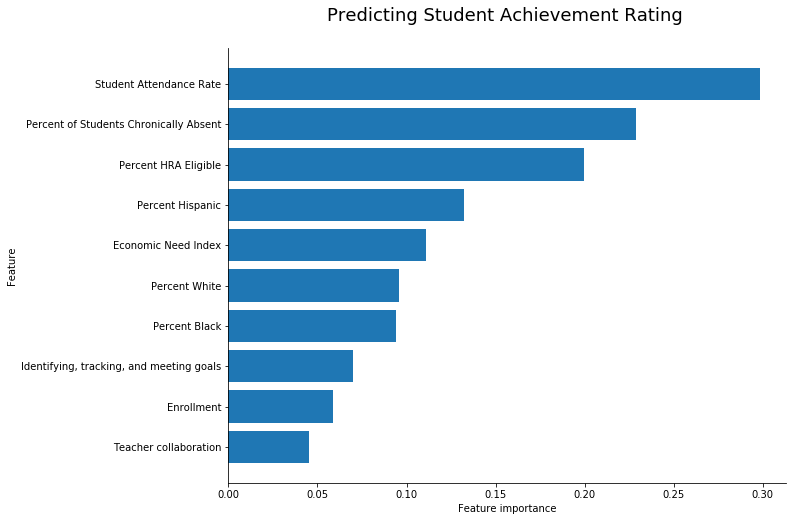

In [15]:
plt.figure(figsize=(10, 8))
plt.barh(svm_feat_imp['Feature'][-10:],
         svm_feat_imp['Absolute Coefficient'][-10:],
         align='center')
sns.despine(left=False, bottom=False)
plt.xlabel('Feature importance', fontsize=18)
plt.ylabel('Feature', fontsize=18)
plt.title(f'Predicting Student Achievement Rating \n', fontsize=18)
plt.savefig('Images/rating_feat_imp.png', bbox_inches='tight');

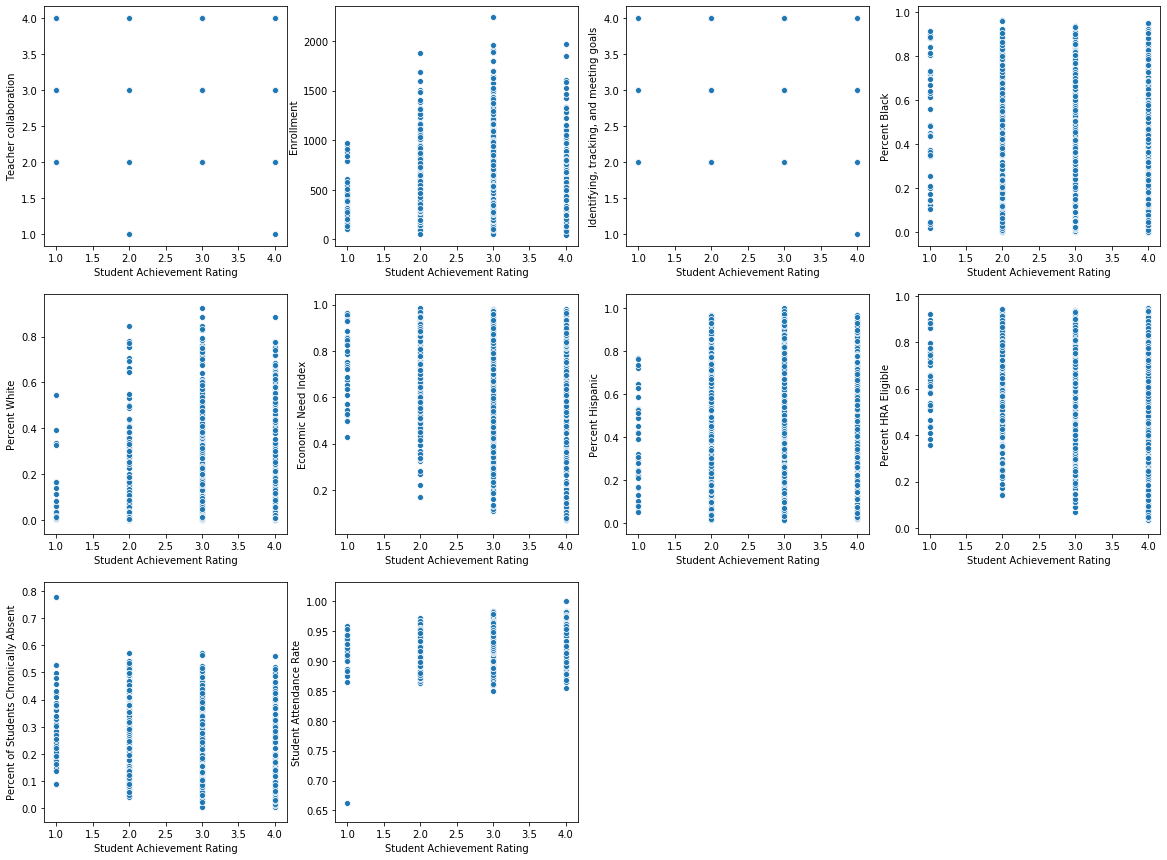

In [23]:
plt.figure(figsize=(20, 15))
for row, col in enumerate(list(svm_feat_imp['Feature'][-10:].values)):
    plt.subplot(3, 4, row+1)
    sns.scatterplot(nyc_schools['Student Achievement Rating'],
                    nyc_schools[col])